In [83]:
import taichi as ti
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [43]:
vel = np.load('vel6000.np')
print(np.shape(vel))
u = vel[:, :, 0]
v = vel[:, :, 1]
uv = np.sqrt(u**2 + v**2)
print(np.shape(u), np.shape(v))

(401, 101, 2)
(401, 101) (401, 101)


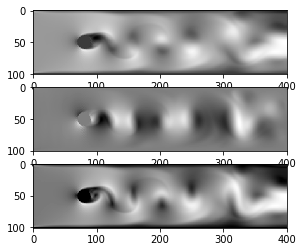

In [111]:
plt.figure()
plt.subplot(311)
plt.imshow(u.T, cmap = 'gray')
plt.subplot(312)
plt.imshow(v.T, cmap = 'gray')
plt.subplot(313)
plt.imshow(uv.T, cmap = 'gray')
plt.show()

In [112]:
img = cm.gray(uv)
print(np.shape(img))

(401, 101, 4)


In [58]:
ugrad = np.gradient(u)
vgrad = np.gradient(v)
print(np.shape(ugrad))
# vor = dv/dx - du/dy
du_dy = ugrad[1]
dv_dx = vgrad[0]

(2, 401, 101)


In [59]:
dv_dx

array([[ 0.0000000e+00,  7.9718167e-03,  9.2043038e-03, ...,
        -9.1804899e-03, -7.9518976e-03,  0.0000000e+00],
       [ 0.0000000e+00,  2.6757559e-03,  4.7010779e-03, ...,
        -4.6750871e-03, -2.6575411e-03,  0.0000000e+00],
       [ 0.0000000e+00, -3.9251754e-03, -1.9796509e-03, ...,
         2.0095094e-03,  3.9399462e-03,  0.0000000e+00],
       ...,
       [ 0.0000000e+00, -7.8313940e-05, -1.6512501e-04, ...,
         7.5289703e-05,  2.2222699e-05,  0.0000000e+00],
       [ 0.0000000e+00, -2.7783622e-05, -5.1508105e-05, ...,
         2.5553702e-05,  1.5569603e-06,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [60]:
du_dy

array([[ 0.1       ,  0.05      ,  0.        , ...,  0.        ,
        -0.05      , -0.1       ],
       [ 0.08591858,  0.0554657 ,  0.00691098, ..., -0.00690738,
        -0.0554374 , -0.08587613],
       [ 0.07838087,  0.05781799,  0.01248048, ..., -0.01246583,
        -0.05776483, -0.07830226],
       ...,
       [-0.01798164, -0.0122283 ,  0.00103825, ..., -0.01132439,
        -0.0127709 , -0.01356346],
       [-0.01787372, -0.01216645,  0.00105098, ..., -0.01131281,
        -0.01270426, -0.01346185],
       [-0.01787372, -0.01216645,  0.00105098, ..., -0.01131281,
        -0.01270426, -0.01346185]], dtype=float32)

In [69]:
vor = dv_dx - du_dy
print(np.shape(vor))
print(vor)

(401, 101)
[[-0.1        -0.04202818  0.0092043  ... -0.00918049  0.0420481
   0.1       ]
 [-0.08591858 -0.05278994 -0.0022099  ...  0.00223229  0.05277986
   0.08587613]
 [-0.07838087 -0.06174317 -0.01446013 ...  0.01447534  0.06170477
   0.07830226]
 ...
 [ 0.01798164  0.01214998 -0.00120338 ...  0.01139968  0.01279313
   0.01356346]
 [ 0.01787372  0.01213866 -0.00110249 ...  0.01133837  0.01270582
   0.01346185]
 [ 0.01787372  0.01216645 -0.00105098 ...  0.01131281  0.01270426
   0.01346185]]


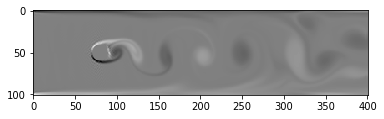

In [74]:
plt.imshow(vor.T, cmap = 'gray')
plt.show()

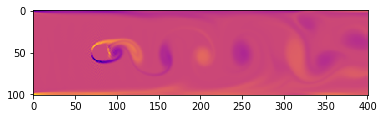

In [75]:
plt.imshow(vor.T, cmap = 'plasma')
plt.show()

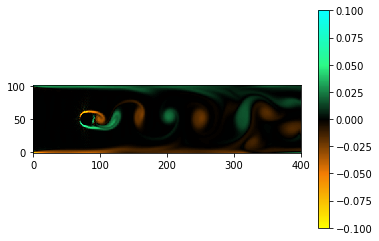

In [104]:

colors = [(1, 1, 0), (0.953, 0.490, 0.016), (0, 0, 0), (0.176, 0.976, 0.529), (0.03, 1, 1)]

plt.figure()
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'my_cmap', colors, N=n_bin)
# n_bin 越小，插值得到的颜色区间越少
plt.imshow(vor.T, interpolation='nearest', origin='lower', cmap=my_cmap)
plt.colorbar()
plt.show()    

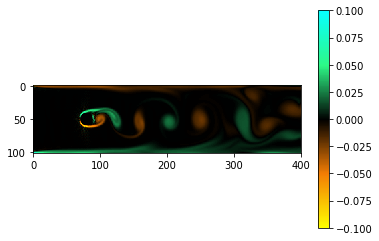

In [122]:
plt.imshow(vor.T, cmap=my_cmap)
plt.colorbar()
plt.show()

In [113]:
img = my_cmap(vor)
print(np.shape(img))

(401, 101, 4)


In [117]:
cm.plasma(uv)

array([[[0.050383, 0.029803, 0.527975, 1.      ],
        [0.254627, 0.013882, 0.615419, 1.      ],
        [0.254627, 0.013882, 0.615419, 1.      ],
        ...,
        [0.254627, 0.013882, 0.615419, 1.      ],
        [0.254627, 0.013882, 0.615419, 1.      ],
        [0.050383, 0.029803, 0.527975, 1.      ]],

       [[0.050383, 0.029803, 0.527975, 1.      ],
        [0.234715, 0.015502, 0.607592, 1.      ],
        [0.274191, 0.012109, 0.622722, 1.      ],
        ...,
        [0.274191, 0.012109, 0.622722, 1.      ],
        [0.234715, 0.015502, 0.607592, 1.      ],
        [0.050383, 0.029803, 0.527975, 1.      ]],

       [[0.050383, 0.029803, 0.527975, 1.      ],
        [0.221197, 0.016497, 0.602083, 1.      ],
        [0.280648, 0.011488, 0.625038, 1.      ],
        ...,
        [0.280648, 0.011488, 0.625038, 1.      ],
        [0.221197, 0.016497, 0.602083, 1.      ],
        [0.050383, 0.029803, 0.527975, 1.      ]],

       ...,

       [[0.050383, 0.029803, 0.527975, 1. 

In [132]:
img = cm.ScalarMappable(cmap=my_cmap).to_rgba(vor.T)

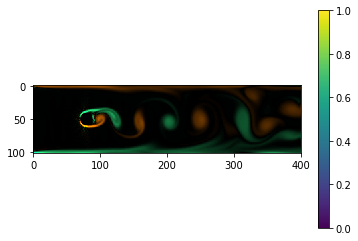

In [133]:
plt.imshow(img)
plt.colorbar()
plt.show()